# ⛑️ Exploratory Data Analysis

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](<https://colab.research.google.com/>)

# 1. ⚙️ Imports

Import the necessary libraries and packages.

In [1]:
import pandas as pd
import plotly.express as px

# Local Libraries
from data import data

# Data

In [2]:
state_vs_party_dataframe_path = data.get_dataset_path("rbs", "processed", "us_presidential_elections_by_state_and_party", 1)

In [3]:
state_vs_party_dataframe = pd.read_csv(state_vs_party_dataframe_path)

In [4]:
state_vs_party_dataframe[1:].head()

,Year,1972,1976,1980,1984,1988,1992,1996,2000,2004,2008,2012,2016,2020,2024
1,Alabama,Republican,Democratic,Republican,Republican,Republican,Republican,Republican,Republican,Republican,Republican,Republican,Republican,Republican,Republican
2,Alaska,Republican,Republican,Republican,Republican,Republican,Republican,Republican,Republican,Republican,Republican,Republican,Republican,Republican,Republican
3,Arizona,Republican,Republican,Republican,Republican,Republican,Republican,Democratic,Republican,Republican,Republican,Republican,Republican,Democratic,Republican
4,Arkansas,Republican,Democratic,Republican,Republican,Republican,Democratic,Democratic,Republican,Republican,Republican,Republican,Republican,Republican,Republican
5,California,Republican,Republican,Republican,Republican,Republican,Democratic,Democratic,Democratic,Democratic,Democratic,Democratic,Democratic,Democratic,Democratic


# Plot

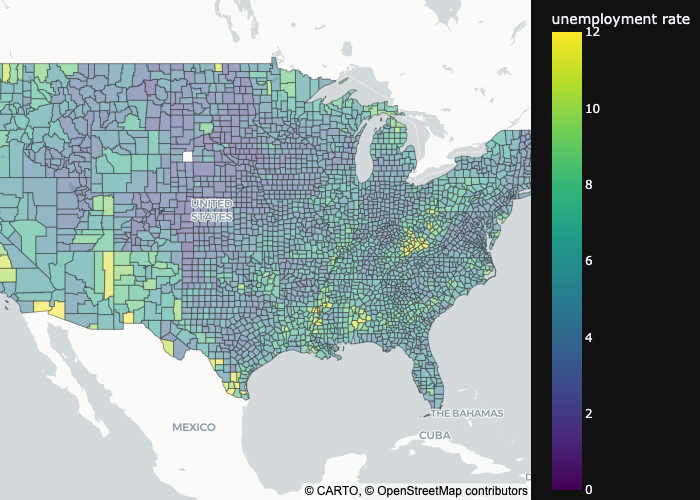

In [8]:
from urllib.request import urlopen
import json
with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties = json.load(response)

import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/fips-unemp-16.csv",
                   dtype={"fips": str})

import plotly.express as px

fig = px.choropleth_map(df, geojson=counties, locations='fips', color='unemp',
                           color_continuous_scale="Viridis",
                           range_color=(0, 12),
                           map_style="carto-positron",
                           zoom=3, center = {"lat": 37.0902, "lon": -95.7129},
                           opacity=0.5,
                           labels={'unemp':'unemployment rate'}
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show("png")

/var/folders/2m/9bvbt7dn2zx7184bhz4tkqd40000gp/T/ipykernel_1689/1052109358.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



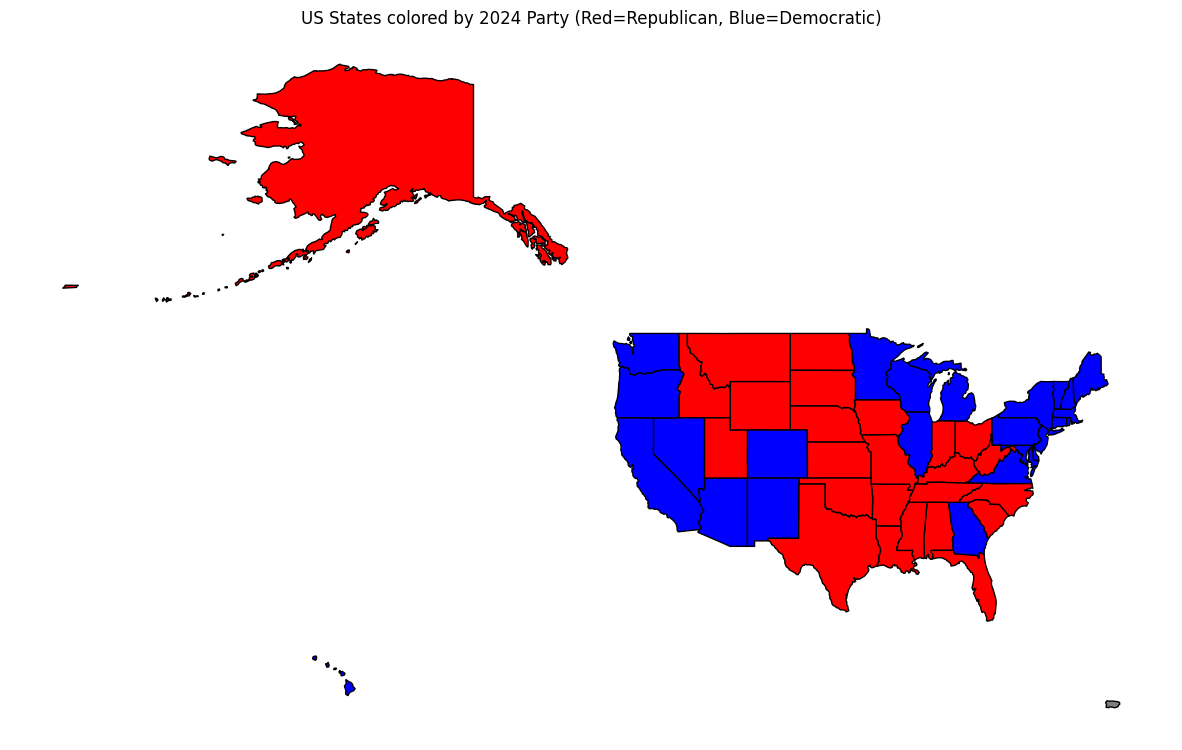

In [7]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from io import StringIO
#
# data = """
# ,State,1972,1976,1980,1984,1988,1992,1996,2000,2004,2008,2012,2016,2020,2024
# 1,Alabama,Republican,Democratic,Republican,Republican,Republican,Republican,Republican,Republican,Republican,Republican,Republican,Republican,Republican,Republican
# 2,Alaska,Republican,Republican,Republican,Republican,Republican,Republican,Republican,Republican,Republican,Republican,Republican,Republican,Republican,Republican
# 3,Arizona,Republican,Republican,Republican,Republican,Republican,Republican,Democratic,Republican,Republican,Republican,Republican,Republican,Democratic,Republican
# 4,Arkansas,Republican,Democratic,Republican,Republican,Republican,Democratic,Democratic,Republican,Republican,Republican,Republican,Republican,Republican,Republican
# 5,California,Republican,Republican,Republican,Republican,Republican,Democratic,Democratic,Democratic,Democratic,Democratic,Democratic,Democratic,Democratic,Democratic
# """
#
# df = pd.read_csv(StringIO(data), index_col=0)
year = "2020"

df = state_vs_party_dataframe[1:].copy()
df_2024 = df[['Year', year]]

party_color_map = {'Republican': 'red', 'Democratic': 'blue'}
df_2024['color'] = df_2024[year].map(party_color_map)

# Load US states GeoJSON from a public GitHub repo
us_states = gpd.read_file('https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json')

# Merge on state name (adjust case if needed)
merged = us_states.merge(df_2024, left_on='name', right_on='Year', how='left')

# Plot
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged.plot(color=merged['color'].fillna('gray'), ax=ax, edgecolor='black')

ax.set_title("US States colored by 2024 Party (Red=Republican, Blue=Democratic)")
ax.axis('off')

plt.show("png")


In [17]:
state_vs_party_dataframe[year].value_counts()

2020
Democratic    27
Republican    25
Name: count, dtype: int64

In [18]:
year

'2020'